##### question 1

In [4]:
import statistics

data = [36, 49, 64]
mean = statistics.mean(data)
stdev = statistics.stdev(data)

for i in data:
    zscore = (i-mean)/stdev
    print(zscore)

-0.9753614395431032
-0.04757860680698048
1.0229400463500842


##### question 2

In [30]:
from sklearn import preprocessing
import numpy as np

data = np.array([[ 0, 1,  4],
                    [ 9,  16,  25],
                    [ 36,  49, 64]])

scaler=preprocessing.StandardScaler().fit(data)

data_scaled= scaler.transform(data)
normalized_data=preprocessing.normalize(data_scaled, norm='l2')
normalized_data

array([[-0.54492137, -0.58204529, -0.60355943],
       [-0.71415267, -0.54486131, -0.43944523],
       [ 0.5874998 ,  0.57629797,  0.56808858]])

##### question 3

In [24]:
a = input("Enter your DNA sequence: ")
a = a.upper()
print("Your DNA sequence is", a)
# RNA = a.translate(str.maketrans({'G': 'C', 'C': 'G'}))
# RNA = RNA.translate(str.maketrans({'A': 'U', 'T': 'A'}))
RNA = a.translate(str.maketrans({'G': 'C', 'C': 'G', 'A': 'U', 'T': 'A'}))
print(RNA)

Your DNA sequence is GGGTTTGGGTTAAGTATGAG
CCCAAACCCAAUUCAUACUC


In [22]:
import string

dna = 'GGGTTTGGGTTAAGTATGAG'
rna = {'G': 'C', 'C': 'G', 'A': 'U', 'T': 'A'}

rna = dna.maketrans(rna)
# RNA = string.maketrans(dna)
print(dna.maketrans(rna))

{71: 'C', 67: 'G', 65: 'U', 84: 'A'}


##### question 4

In [27]:
import numpy as np
import pandas as pd
import sklearn
import tensorflow
import matplotlib as map

In [28]:
# load dataset
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = pd.get_dummies(iris.target, prefix='iris category')

In [29]:
# data splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=100)

print("shape of x_train", x_train.shape)
print("shape of x_test", x_test.shape)

shape of x_train (120, 4)
shape of x_test (30, 4)


In [34]:
from keras.models import Sequential
from keras.layers import Dense

import tensorflow as tf
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dense(25, activation='relu'),
  tf.keras.layers.Dense(3)
])

network = Sequential()
network.add(Dense(50, activation="relu"))
network.add(Dense(25, activation="relu"))
network.add(Dense(3))

In [35]:
from keras.utils import to_categorical

train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)
network.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [36]:
network.fit(x_train, train_labels, epochs=150,batch_size=40)
test_loss, test_acc = network.evaluate(x_test, test_labels)
test_loss, test_acc = network.evaluate(x_test, test_labels)

print("Test Accuracy: ", test_acc, "\nTest Loss: ", test_loss)

Epoch 1/150
3/3 [==============================] - 1s 6ms/step - loss: 5.8563 - accuracy: 0.3667
Epoch 2/150
3/3 [==============================] - 0s 3ms/step - loss: 5.6679 - accuracy: 0.3667
Epoch 3/150
3/3 [==============================] - 0s 3ms/step - loss: 5.5636 - accuracy: 0.3667
Epoch 4/150
3/3 [==============================] - 0s 4ms/step - loss: 5.3275 - accuracy: 0.3667
Epoch 5/150
3/3 [==============================] - 0s 3ms/step - loss: 2.1264 - accuracy: 0.3667
Epoch 6/150
3/3 [==============================] - 0s 4ms/step - loss: 0.1429 - accuracy: 0.3667
Epoch 7/150
3/3 [==============================] - 0s 4ms/step - loss: 1.1921e-07 - accuracy: 0.1417
Epoch 8/150
3/3 [==============================] - 0s 5ms/step - loss: 1.2089 - accuracy: 0.2833
Epoch 9/150
3/3 [==============================] - 0s 4ms/step - loss: 7.1188 - accuracy: 0.3000
Epoch 10/150
3/3 [==============================] - 0s 4ms/step - loss: 10.6111 - accuracy: 0.3083
Epoch 11/150
3/3 [======

ValueError: x has 4 columns but y has 3 columns

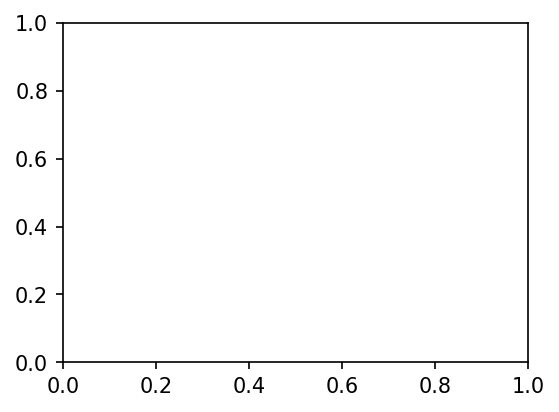

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,3), dpi=150)
plt.plot(X,y, 'b^--', label='2x',)

plt.show()

##### question 5

In [41]:
technique = ["support vector machine", "logistic regression model", "random forest",
             "artificial neural network", "convolutional neural networks",
             "recurrent neural networks", "k-means clustering", "principal components analysis"]
machine_learning = []
deep_learning = []

for list in technique:
    if list == "support vector machine" or list == "logistic regression model" or list == "random forest" or list == "k-means clustering":
        machine_learning.append(list)
    else:
        deep_learning.append(list)
        
print("machine learning: ", machine_learning, end='\n\n')
print("deep learning: ", deep_learning, end='\n')

machine learning:  ['support vector machine', 'logistic regression model', 'random forest', 'k-means clustering']

deep learning:  ['artificial neural network', 'convolutional neural networks', 'recurrent neural networks', 'principal components analysis']


##### question 6

In [26]:
def approxMatch(str1, str2):
    len1 = len(str1)
    len2 = len(str2)
    
    if (len1 == 0):
        return len2
    if (len2 == 0):
        return len1
    
    match = approxMatch(str1[1:len1], str2[1:len2])
    
    if (str1[0] != str2[0]):
        match = match + 1
        
    del1 = 1 + approxMatch(str1[1:len1], str2)
    del2 = 1 + approxMatch(str1, str2[1:len2])
    return min(match, del1, del2)

print(approxMatch("TCCCAGT", "AATCAGATC"))

5
